# Pré-processamento

## 1. O que é?

As funções de pré-processamento permitem a realização de diversas transformações nos dados, visando melhorar o desempenho dos algoritmos de machine learning.

## 2. Tipos de pré-processamento

### 2.1. StandardScaler: Padronização da Escala (Feature Scaling)

A padronização da escala é uma etapa comum de pré-processamento que visa tornar as características (features) dos dados comparáveis, eliminando diferenças nas magnitudes entre elas. Isso é importante para algoritmos sensíveis à escala das características, como regressão linear e métodos baseados em gradiente.

Um método comumente utilizado para padronização da escala é o StandardScaler.

In [1]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

# Carregar os dados de exemplo Wine
features, target = load_wine(return_X_y=True)

# Inicializar e aplicar o StandardScaler para padronizar as features
features_padronizadas = StandardScaler().fit_transform(features)

# Exibir as features padronizadas
features_padronizadas

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [2]:
# Exibir as features originais
features

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

Este código carrega os dados de exemplo do conjunto Wine utilizando a função `load_wine`. Em seguida, aplica o `StandardScaler` para padronizar as features. O resultado são as features padronizadas, que foram ajustadas para ter média zero e desvio padrão unitário. Essa padronização é útil para garantir que todas as features tenham a mesma escala, o que pode melhorar o desempenho de certos algoritmos de aprendizado de máquina.

### 2.2. QuantileTransformer: Transformações não-lineares

Transformações não-lineares são aplicadas para modificar a distribuição dos dados, tornando-a mais adequada para determinados algoritmos ou melhorando o desempenho do modelo.

Um exemplo de transformação não-linear é o QuantileTransformer, que mapeia os dados para uma distribuição específica, muitas vezes aproximando-se de uma distribuição normal.

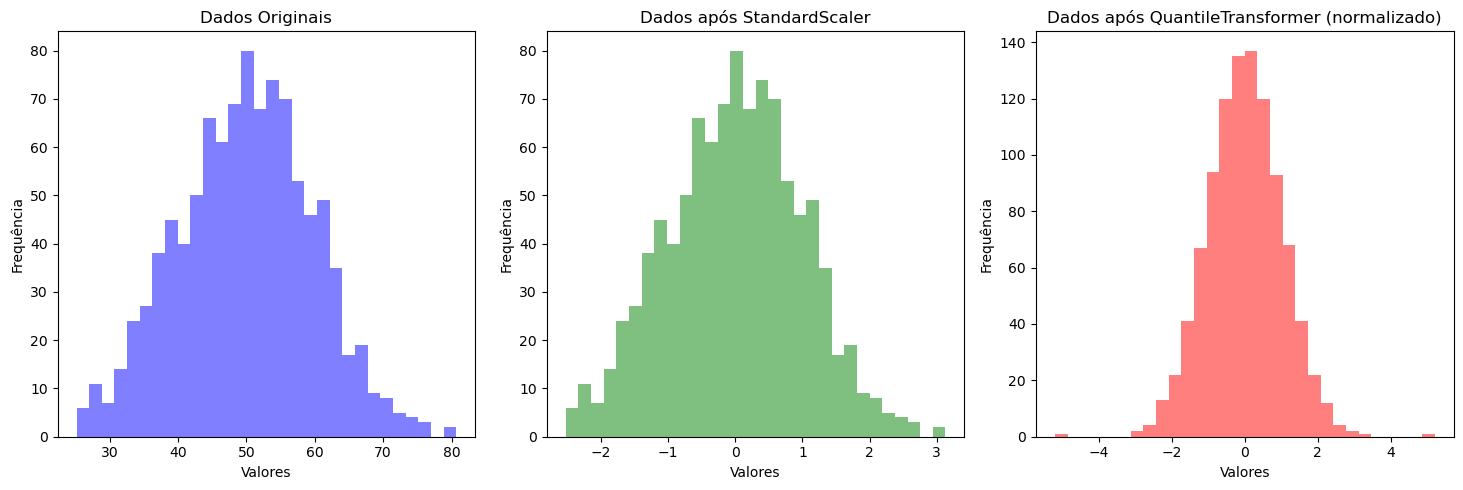

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, QuantileTransformer

def compare_transformations(data):
    # StandardScaler transformation
    scaler = StandardScaler()
    data_standard_scaled = scaler.fit_transform(data)

    # QuantileTransformer transformation
    transformer = QuantileTransformer(n_quantiles=500, output_distribution='normal')
    data_quantile_transformed = transformer.fit_transform(data)

    # Plotando os histogramas para comparação
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    # Histograma dos dados originais
    axs[0].hist(data, bins=30, color='blue', alpha=0.5)
    axs[0].set_title('Dados Originais')
    axs[0].set_xlabel('Valores')
    axs[0].set_ylabel('Frequência')

    # Histograma dos dados após StandardScaler
    axs[1].hist(data_standard_scaled, bins=30, color='green', alpha=0.5)
    axs[1].set_title('Dados após StandardScaler')
    axs[1].set_xlabel('Valores')
    axs[1].set_ylabel('Frequência')

    # Histograma dos dados após QuantileTransformer
    axs[2].hist(data_quantile_transformed, bins=30, color='red', alpha=0.5)
    axs[2].set_title('Dados após QuantileTransformer (normalizado)')
    axs[2].set_xlabel('Valores')
    axs[2].set_ylabel('Frequência')

    plt.tight_layout()
    plt.show()

# Exemplo de uso
data = np.random.normal(loc=50, scale=10, size=1000).reshape(-1, 1)  # Dados normalmente distribuídos
compare_transformations(data)

A diferença fundamental entre o StandardScaler e o QuantileTransformer é o método de transformação dos dados.

**StandardScaler:** O StandardScaler aplica uma transformação que centraliza os dados ao redor de zero e os escala para ter uma variância unitária. Isso significa que os dados resultantes terão uma média zero e um desvio padrão de um.

**QuantileTransformer:** Por outro lado, o QuantileTransformer ajusta uma transformação para os dados de forma que a distribuição dos dados seja uniforme ou siga uma distribuição específica (como uma distribuição normal). Ele mapeia os dados para uma distribuição específica, geralmente usando quantis empíricos.

Em termos de efeito nos dados, podemos esperar o seguinte:

- O StandardScaler centraliza e redimensiona os dados, mas não garante que a distribuição resultante seja normal.
- O QuantileTransformer, com `output_distribution='normal'`, busca explicitamente transformar os dados para uma distribuição normal, ajustando quantis empíricos.

Então, em resumo, a principal diferença está na intenção da transformação:

- O StandardScaler é frequentemente usado para preparar os dados para algoritmos que se beneficiam de dados com média zero e variância unitária, como muitos algoritmos baseados em gradiente.
- O QuantileTransformer com `output_distribution='normal'` é usado quando se deseja uma distribuição normal dos dados após a transformação. Isso pode ser útil em métodos que assumem normalidade dos dados, como muitos métodos estatísticos.

### 2.3. get_dummies: Transformação de Variáveis Qualitativas em Variáveis Quantitativas Dummy

A codificação de variáveis categóricas é uma etapa crucial no pré-processamento de dados, permitindo que algoritmos de machine learning lidem com informações qualitativas. Uma abordagem comum para realizar essa codificação é o One-Hot Encoding. Nesse método, cada categoria da variável categórica é transformada em uma variável indicadora (dummy), onde cada variável dummy representa a presença ou ausência de uma categoria específica.
de realizar essa codificação é usando a função `get_dummies` do Pandas. Esta função automatiza o processo de criação de variáveis dummy para cada categoria da variável categórica, tornando o pré-processamento mais conveniente e eficiente. Além disso, ao configurar o argumento `drop_first=True`, é possível evitar a multicolinearidade ao excluir a primeira categoria, garantindo um conjunto de variáveis independentes. Essa abordagem simplifica ainda mais o processo de preparação dos dados para análise e modelagem.



In [15]:
# Importação dos dados
import pandas as pd

titanic = pd.read_csv('titanic_train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
# Transformar a variável categórica 'Sex' em variáveis dummy
# A função get_dummies do pandas realiza essa transformação
# O argumento 'drop_first=True' remove a primeira categoria de cada variável dummy para evitar multicolinearidade
dummy_sex = pd.get_dummies(titanic[['Sex']], drop_first=True)

# Remover a coluna original 'Sex' do DataFrame titanic
titanic.drop('Sex', axis=1, inplace=True)

# Concatenar as variáveis dummy ao DataFrame titanic
titanic = pd.concat([titanic, dummy_sex], axis=1)

In [17]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1


### 2.4. Discretização

A discretização é a transformação de uma variável quantitativa em uma variável qualitativa. Essa técnica pode ser útil para introduzir não-linearidade em algoritmos lineares e aumentar a interpretabilidade do modelo.

Essas são apenas algumas das principais funções de pré-processamento, e é importante explorar e aplicar as técnicas mais adequadas para cada conjunto de dados e problema específico.

In [18]:
# Importação dos dados
import pandas as pd

titanic = pd.read_csv('titanic_train.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


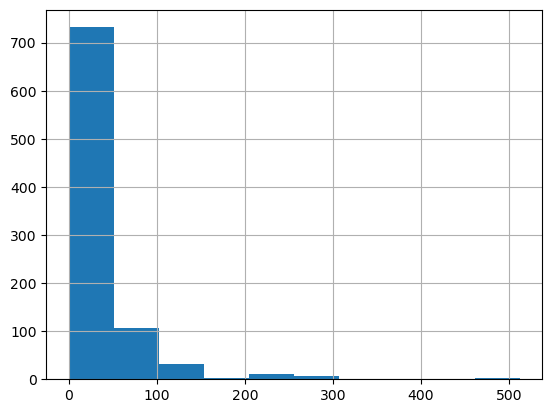

In [19]:
titanic['Fare'].hist()

In [20]:
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer

# Carregar os dados do Titanic
titanic = pd.read_csv('titanic_train.csv')

# Selecionar a coluna 'Fare' para discretização
fare_data = titanic[['Fare']]

# Definir o número de bins para a discretização
n_bins = 5

# Criar o objeto KBinsDiscretizer e realizar a discretização
kbins_discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='quantile')
fare_discretized = kbins_discretizer.fit_transform(fare_data)

# Adicionar as colunas discretizadas ao DataFrame original
titanic[f'Fare_Group'] = fare_discretized

# Exibir as primeiras linhas do DataFrame resultante
titanic.sample(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Group
295,296,0,1,"Lewy, Mr. Ervin G",male,NaN,0,0,PC 17612,27.7208,NaN,C,3.0
485,486,0,3,"Lefebre, Miss. Jeannie",female,NaN,3,1,4133,25.4667,NaN,S,3.0
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S,4.0
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,2.0
274,275,1,3,"Healy, Miss. Hanora ""Nora""",female,NaN,0,0,370375,7.7500,NaN,Q,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4.0
801,802,1,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.0,1,1,C.A. 31921,26.2500,NaN,S,3.0
232,233,0,2,"Sjostedt, Mr. Ernst Adolf",male,59.0,0,0,237442,13.5000,NaN,S,2.0
680,681,0,3,"Peters, Miss. Katie",female,NaN,0,0,330935,8.1375,NaN,Q,1.0
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0000,NaN,S,0.0


In [21]:
# Visualizar estatísticas descritivas para cada grupo criado
titanic.groupby('Fare_Group')['Fare'].describe()

,count,mean,std,min,25%,50%,75%,max
Fare_Group,,,,,,,,
0.0,166.0,6.742145,2.181854,0.0000,7.129175,7.28125,7.7500,7.8292
1.0,173.0,8.305897,0.625074,7.8542,7.895800,8.05000,8.6625,10.4625
2.0,195.0,14.601559,3.054094,10.5000,13.000000,14.00000,16.0500,21.0750
3.0,175.0,28.512118,4.089370,21.6792,26.000000,26.55000,30.6958,39.6000
4.0,182.0,100.554442,76.985133,39.6875,56.048950,77.28750,110.8833,512.3292
